# 0.0 - Imports

In [1]:
# Bibliotecas
import pandas  as pd
import numpy   as np
import seaborn as sns
import geopandas
import plotly.express as px

from matplotlib import pyplot as plt
from IPython.display     import HTML, Image

# Formatações Essenciais
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 0.1 - Helper Functions

In [2]:
# --------------------------------- LAYOUT --------------------------------------------------------

# Configurações de Layout
def jupyter_settings():
    %matplotlib inline
    #%pylab inline
    
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = (24,9)
    plt.rcParams['font.size'] = 24
    
    display( HTML('<style>.container {width:93% ! important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()
    
jupyter_settings()



# ---------------------------------  EXTRAÇÃO DAS INFORMÇÕES --------------------------------------

# Essa função realização a extração dos dados da máquina
def base_de_dados(file):
    
    return pd.read_csv(file)   
    
    
# -------------------------------- TRANSFORMAÇÃO DOS DADOS  ----------------------------------------


# Essa função limpa e organiza os dados que nós precisamos para trabalhar
def limpeza_organizacao_dados(dataset):
    
    # transformação das datas para datetime
    dataset['date'] = pd.to_datetime(dataset['date'])
    
    # Criação da coluna month e vamos preencher somente com os mês e o dia das datas.
    data['month'] = pd.to_datetime(data['date']).dt.strftime('%m-%d')
    
    # transformação das informações da coluna waterfront
    dataset['waterfront'] = dataset['waterfront'].apply(lambda x: 'yes' if x == 1 else 'no')
    
    # criação da coluna seasons
    dataset['seasons'] = data['month'].apply(lambda x:'summer' if '06-21' <= x < '09-23' else
                                                      'autumn' if '09-23' <= x < '12-21' else
                                                      'spring' if '03-20' <= x < '06-21' else 'winter')    
    
    # criação da coluna onde será informado se a casa será comprada ou  não
    data['option_buy'] = 'no_buy'
    
    # criacao da coluna em que será adicionado a mediana do preços de cada região
    data['median_price_zipcode'] = ''
    
    # Retorno das transformações
    return dataset


# Essa funcao vai nos agrupar os dados por região, calcular a média dos preços dos imóveis dessas regiões.
def media_precos_regiao(dataset):
    
    # Cálculo da Média
    dataframe = dataset[['price', 'zipcode']].groupby('zipcode').median().reset_index()
    
    # Renomeação das Colunas
    dataframe.columns = ['zipcode', 'median_price']
    
    # ????
    for i in range(len(dataframe)):
        for j in range(len(dataset)):
            if (dataset.loc[j, 'zipcode'] == dataframe.loc[i, 'zipcode']):
                dataset.loc[j, 'median_price_zipcode'] = dataframe.loc[i,'median_price'] 
    
    # Retorno das Informações
    return dataset, dataframe


# Função que realiza a classificaçaõ e não classificação dos imóveis para compra.
def classificacao_compra(dataset):
    
    # Classicação de compra e não compra de imóveis.
    dataset['option_buy'] = dataset[['price', 'condition', 'median_price_zipcode']].apply(lambda x: 'buy' if (x['price'] < x['median_price_zipcode']) and (x['condition'] > 2) else 'no_buy', axis=1)
    
    # Retorno das Classificações
    return dataset


# Essa função vai nos retornar um dataframe com a media dos preços de cada região durante o verão
def media_precos_verao(dataset):
    
    # selecionar somente os imóveis que tiveram o preço disponibilizado durante o verão
    dataset_summer = dataset[dataset['seasons'] == 'summer']
    
    # agrupar os preços por zipcode e obter a mediana dos preços durante o verão
    dataframe_summer = dataset_summer[['price', 'zipcode']].groupby('zipcode').median().reset_index()
    
    # Renomear coluna
    dataframe_summer.columns = ['zipcode', 'median_price_summer']
    
    # Retorno do DataFrame
    return dataframe_summer


# Essa função vai nos retornar um dataframe com a media dos preços de cada região durante o inverno 
def media_precos_inverno(dataset):
    
    # selecionar somente os imóveis que tiveram os preços disponibilizados durante o inverno
    dataset_winter = dataset[dataset['seasons'] == 'winter']
    
    # agrupar os preços por zipcode e obter a mediana dos preços durante o inverno
    dataframe_winter = dataset_winter[['price', 'zipcode']].groupby('zipcode').median().reset_index()
    
    # Renomear as colunas
    dataframe_winter.columns = ['zipcode', 'median_price_winter']
    
    # Retorno do DataFrame
    return dataframe_winter
    
    
# Essa função vai nos retornar um dataframe com a media dos preços de cada região durante o outono    
def media_precos_outono(dataset):   
    
    # selecionar somente os imóveis que tiveram os preços disponibilizados durante o outono
    dataset_autumn = dataset[dataset['seasons'] == 'autumn']
                                
    # agrupar os dados por zipcode e obter a mediana dos preços durante o outono
    dataframe_autumn = dataset_autumn[['price', 'zipcode']].groupby('zipcode').median().reset_index()
                                
    # Renomear as colunas
    dataframe_autumn.columns = ['zipcode', 'median_price_autumn']
    
    # Retorno do DataFrame
    return dataframe_autumn

                                
# Essa função vai nos retornar um dataframe com a media dos preços de cada região durante o primavera       
def media_precos_primavera(dataset):
    
    # selecionar somente os imóveis que tiveram os preços disponibilizados durante a primavera
    dataset_spring = dataset[dataset['seasons'] == 'spring']
    
    # agrupar os preços por zipcode e obter a mediana dos preços durante a primavera
    dataframe_spring = dataset_spring[['price', 'zipcode']].groupby('zipcode').median().reset_index()
                                
    # Renomear as colunas
    dataframe_spring.columns = ['zipcode', 'median_price_spring']
                                
    # Retorno do DataFrame                            
    return dataframe_spring
    

# Essa função vai nos retornar uma dataframe com os preços de vendas por região durante o verão.
def vendas_imoveis_verao(dataset, dataframe_summer):
    
    # vamos criar uma colunas que vai receber o preço de venda das casas durante o verão
    dataset['sell_price_summer'] = 0
    
    # Estrutura que vai estabelecer o preço de venda das casas
    for i in range(len(dataframe_summer)):
        for j in range(len(dataset)):
            if (dataframe_summer.loc[i,'zipcode'] == dataset.loc[j,'zipcode']) and   (dataframe_summer.loc[i,'median_price_summer'] < dataset.loc[j,'price']):
                dataset.loc[j, 'sell_price_summer'] = dataset.loc[j, 'price']*1.1
                
            if (dataframe_summer.loc[i,'zipcode'] == dataset.loc[j,'zipcode']) and (dataframe_summer.loc[i,'median_price_summer'] >= dataset.loc[j,'price']):
                dataset.loc[j, 'sell_price_summer'] = dataset.loc[j, 'price']*1.3
    
    # Retorno das informações
    return dataset   


# Essa função vai nos retornar uma dataframe com os preços de vendas por região durante o inverno.
def vendas_imoveis_inverno(dataset, dataframe_winter):
    
    # vamos criar uma coluna que vai receber os preços médios de venda dos imoveis durante o inverno.
    dataset['sell_price_winter'] = 0
    
    # estrutura que vai estabelecer o preço de venda das casas
    for i in range(len(dataframe_winter)):
        for j in range(len(dataset)):
            if (dataframe_winter.loc[i, 'zipcode'] == dataset.loc[j, 'zipcode']) and (dataframe_winter.loc[i, 'median_price_winter'] < dataset.loc[j, 'price']):
                dataset.loc[j, 'sell_price_winter'] = dataset.loc[j, 'price']*1.1
                
            if (dataframe_winter.loc[i,'zipcode'] == dataset.loc[j,'zipcode']) and (dataframe_winter.loc[i,'median_price_winter'] >= dataset.loc[j,'price']):
                dataset.loc[j, 'sell_price_winter'] = dataset.loc[j, 'price']*1.3
    
    # Retorno do dataset
    return dataset
    
    
# Essa função vai nos retornar uma dataframe com os preços de vendas por região durante o outono.
def vendas_imoveis_outono(dataset, dataframe_autumn):
    
    # vamos criar uma coluna que vai receber os preços médios de venda dos imoveis durante o inverno.
    dataset['sell_price_autumn'] = 0
    
    # estrutura que vai estabelecer o preço de venda das casas
    for i in range(len(dataframe_autumn)):
        for j in range(len(dataset)):
            if (dataframe_autumn.loc[i, 'zipcode'] == dataset.loc[j, 'zipcode']) and (dataframe_autumn.loc[i, 'median_price_autumn'] < dataset.loc[j, 'price']):
                dataset.loc[j, 'sell_price_autumn'] = dataset.loc[j, 'price']*1.1
                
            if (dataframe_autumn.loc[i,'zipcode'] == dataset.loc[j,'zipcode']) and (dataframe_autumn.loc[i,'median_price_autumn'] >= dataset.loc[j,'price']):
                dataset.loc[j, 'sell_price_autumn'] = dataset.loc[j, 'price']*1.3
    
    # Retorno do Dataset
    return dataset
    

# # Essa função vai nos retornar uma dataframe com os preços de vendas por região durante a primavern.
def vendas_imoveis_primavera(dataset, dataframe_spring):
    
    # vamos criar uma coluna que vai receber os preços médios de venda dos imoveis durante o inverno.
    dataset['sell_price_spring'] = 0
    
    # estrutura que vai estabelecer o preço de venda das casas
    for i in range(len(dataframe_spring)):
        for j in range(len(dataset)):
            if (dataframe_spring.loc[i, 'zipcode'] == dataset.loc[j, 'zipcode']) and (dataframe_spring.loc[i, 'median_price_spring'] < dataset.loc[j, 'price']):
                dataset.loc[j, 'sell_price_winter'] = dataset.loc[j, 'price']*1.1
                
            if (dataframe_spring.loc[i,'zipcode'] == dataset.loc[j,'zipcode']) and (dataframe_spring.loc[i,'median_price_spring'] >= dataset.loc[j,'price']):
                dataset.loc[j, 'sell_price_spring'] = dataset.loc[j, 'price']*1.3
            
            
    # Retorno do Dataset        
    return dataset

## 0.2 Carregamento dos Dados

In [3]:
# Aqui estamos obtendo o nosso conjunto de dados para iniciar o nosso projeto
data = base_de_dados('kc_house_data.csv')

# 1.0 - Descrição dos Dados

In [4]:
df1 = data.copy()

## 1.1 - Atributos

**id** - Identificador do imóvel.

**date** - Data de venda da casa.

**price** - Preço que a casa está sendo vendida pelo proprietário.

**bedrooms** - Número de quartos.

**bathrooms** - Número de banheiro.

**sqft_living** - Medida (em pés quadrado) do espaço interior dos apartamentos.

**sqft_lot** - Medida (em pés quadrado) quadrada do espaço terrestre.

**floors** - Número de andares do imóvel

**waterfront** - Variável que indica a presença ou não de vista para água (0 = não e 1 = sim).

**view** - Um índice de 0 a 4 que indica a qualidade da vista da propriedade. Varia de 0 a 4, onde: 0 = baixa e 4 = alta.

**condition** - Um índice de 1 a 5 que indica a condição da casa. Varia de 1 a 5, onde: 1 = baixo e 5 = alta.

**grade** - Um índice de 1 a 13 que indica a construção e o design do edifício. Varia de 1 a 13, onde: 1-3 = baixo, 7 = médio e 11-13 = alta.

**sqft_above** - A metragem quadrada do espaço habitacional interior acima do nível do solo. 

**sqft_basement** - A metragem quadrada do espaço habitacional interior acima do nível do solo.

**yr_built** - Ano de construção de cada imóvel.

**yr_renovated** - Ano de reforma de cada imóvel.

**zipcode** - CEP da casa.

**lat** - latitude.

**long** - longitude.

**sqft_living15** - Medida (em pés quadrado) do espaço interno de habitação para os 15 vizinhos mais próximo

**sqft_lot15** - Medida (em pés quadrado) dos lotes de terra dos 15 vizinhos mais próximo

## 1.2 - Dimensão dos Dados 

In [5]:
# Verificação da dimensão dos dados.
print(f'Quantidade de Linhas: {df1.shape[0]}.')
print(f'Quantidade de Colunas: {df1.shape[1]}.')

Quantidade de Linhas: 21613.
Quantidade de Colunas: 21.


## 1.3 - Checagem dos Valores NA 

In [6]:
# Checagem de NA's
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
# Dropando os dois valores NA.
df1 = df1.dropna()

# Verificaçaõ da Dropagem.
df1.shape

(21611, 21)

## 1.4 - Transformação dos Dados

In [8]:
# transformação das datas para datetime
df1['date'] = pd.to_datetime(df1['date'])

# transformação das informações da coluna waterfront
df1['waterfront'] = df1['waterfront'].apply(lambda x: 'yes' if x == 1 else 'no')

# 2.0 - Feature Engineering

In [9]:
df2 = df1.copy()

In [10]:
# Criação da coluna month e vamos preencher somente com os mês e o dia das datas.
df2['month'] = pd.to_datetime(df2['date']).dt.strftime('%m-%d')

# criação da coluna seasons para determinar o período de venda da casa.
df2['seasons'] = df2['month'].apply(lambda x:'summer' if '06-21' <= x < '09-23' else
                                             'autumn' if '09-23' <= x < '12-21' else
                                             'spring' if '03-20' <= x < '06-21' else 
                                             'winter')  

# criação da coluna onde será informado se a casa será comprada ou  não
df2['option_buy'] = 'no_buy'
    
# criacao da coluna em que será adicionado a mediana do preços de cada região
df2['median_price_zipcode'] = ''

# 3.0 - Análise Exploratória dos Dados

In [11]:
df3 = df2.copy()

## 3.1 - Mediana dos Preços por Região e Classificação de Compras

In [12]:
# Cálculo da Média dos precos por Região
preco_medio_regiao = df3[['price', 'zipcode']].groupby('zipcode').median().reset_index()

# Armazenamento dos dados para mapeamento.
mapemento_zipcode_price = dict(preco_medio_regiao.to_numpy())

# Mapeamento e preenchimento.
df3['median_price_zipcode'] = df3['zipcode'].map(mapemento_zipcode_price)


# ----------------- Classificaçaõ: condition >= 3 e preço de compra menor que a mediana dos preços ----------------------

# Classicação de compra e não compra de imóveis
df3['option_buy'] = df3[['price', 'condition', 'median_price_zipcode']].apply(lambda x: 'buy' if (x['price'] < x['median_price_zipcode']) and (x['condition'] > 2) else 'no_buy', axis=1)

## 3.2 - Mediana dos Preços por Sazonalidade

### Verão

In [13]:
# selecionar somente os imóveis que tiveram o preço disponibilizado durante o verão
dataset_imoveis_summer = df3[df3['seasons'] == 'summer'].copy()
    
# agrupar os preços por zipcode e obter a mediana dos preços durante o verão
preco_mediano_imoveis_summer = dataset_imoveis_summer[['price', 'zipcode']].groupby('zipcode').median().reset_index()
    
# Renomear coluna
preco_mediano_imoveis_summer.columns = ['zipcode', 'median_price_summer']

### Inverno

In [14]:
# selecionar somente os imóveis que tiveram o preço disponibilizado durante o verão
dataset_imoveis_winter = df3[df3['seasons'] == 'winter'].copy()
    
# agrupar os preços por zipcode e obter a mediana dos preços durante o verão
preco_mediano_imoveis_winter = dataset_imoveis_winter[['price', 'zipcode']].groupby('zipcode').median().reset_index()
    
# Renomear coluna
preco_mediano_imoveis_winter.columns = ['zipcode', 'median_price_winter']

### Outono

In [15]:
# selecionar somente os imóveis que tiveram o preço disponibilizado durante o verão
dataset_imoveis_autmumn = df3[df3['seasons'] == 'autmumn'].copy()
    
# agrupar os preços por zipcode e obter a mediana dos preços durante o verão
preco_mediano_imoveis_autmumn = dataset_imoveis_autmumn[['price', 'zipcode']].groupby('zipcode').median().reset_index()
    
# Renomear coluna
preco_mediano_imoveis_autmumn.columns = ['zipcode', 'median_price_autmumn']

### Primavera

In [16]:
# selecionar somente os imóveis que tiveram o preço disponibilizado durante o verão
dataset_imoveis_spring = df3[df3['seasons'] == 'spring'].copy()
    
# agrupar os preços por zipcode e obter a mediana dos preços durante o verão
preco_mediano_imoveis_spring = dataset_imoveis_spring[['price', 'zipcode']].groupby('zipcode').median().reset_index()
    
# Renomear coluna
preco_mediano_imoveis_spring.columns = ['zipcode', 'median_price_spring']

## 3.3 - Precificação dos Imóveis por Sazonalidade

In [17]:
# Seleção dos imóveis a serem compradas com as determinadas condições consideradas
dataset_compra_de_imoveis = df3[df3['option_buy'] == 'buy'].reset_index(drop=True).copy()

### Preço de Vendas - Verão

In [18]:
# Armazenamento dos preços mediano do verão para Mapeamento.
mapeamento_zipcode_price_summer = dict(preco_mediano_imoveis_summer.to_numpy())

# Dataset que vai armazenar os preços dos imóveis com o preço de verão.
dataset_venda_de_imoveis_summer = dataset_compra_de_imoveis.copy()

# mapeamento dos preços do verão por região
dataset_venda_de_imoveis_summer['median_price_zipcode_summer'] = dataset_venda_de_imoveis_summer['zipcode'].map(mapeamento_zipcode_price_summer)


#  ------------------- Loop para precificação ----------------------------------

# vamos criar uma colunas que vai receber o preço de venda das casas durante o verão
dataset_venda_de_imoveis_summer['sell_price_summer'] = 0

for j in range(len(dataset_venda_de_imoveis_summer)):
    if dataset_venda_de_imoveis_summer.loc[j,'median_price_zipcode_summer'] <= dataset_venda_de_imoveis_summer.loc[j,'price']:
        dataset_venda_de_imoveis_summer.loc[j, 'sell_price_summer'] = dataset_venda_de_imoveis_summer.loc[j, 'price']*1.1
    else:
        dataset_venda_de_imoveis_summer.loc[j, 'sell_price_summer'] = dataset_venda_de_imoveis_summer.loc[j, 'price']*1.3

### Preço de Vendas - Inverno

In [19]:
# Armazenamento dos preços mediano do verão para Mapeamento.
mapeamento_zipcode_price_winter = dict(preco_mediano_imoveis_winter.to_numpy())

# Dataset que vai armazenar os preços dos imóveis com o preço de verão.
dataset_venda_de_imoveis_winter = dataset_compra_de_imoveis.copy()

# mapeamento dos preços do verão por região
dataset_venda_de_imoveis_winter['median_price_zipcode_winter'] = dataset_venda_de_imoveis_winter['zipcode'].map(mapeamento_zipcode_price_winter)


#  ------------------- Loop para precificação ----------------------------------

# vamos criar uma colunas que vai receber o preço de venda das casas durante o verão
dataset_venda_de_imoveis_winter['sell_price_winter'] = 0

for j in range(len(dataset_venda_de_imoveis_winter)):
    if dataset_venda_de_imoveis_winter.loc[j,'median_price_zipcode_winter'] <= dataset_venda_de_imoveis_winter.loc[j,'price']:
        dataset_venda_de_imoveis_winter.loc[j, 'sell_price_winter'] = dataset_venda_de_imoveis_winter.loc[j, 'price']*1.1
    else:
        dataset_venda_de_imoveis_winter.loc[j, 'sell_price_winter'] = dataset_venda_de_imoveis_winter.loc[j, 'price']*1.3

### Preço de Vendas - Outono

In [20]:
# Armazenamento dos preços mediano do verão para Mapeamento.
mapeamento_zipcode_price_autmumn = dict(preco_mediano_imoveis_autmumn.to_numpy())

# Dataset que vai armazenar os preços dos imóveis com o preço de verão.
dataset_venda_de_imoveis_autmumn = dataset_compra_de_imoveis.copy()

# mapeamento dos preços do verão por região
dataset_venda_de_imoveis_autmumn['median_price_zipcode_autmumn'] = dataset_venda_de_imoveis_autmumn['zipcode'].map(mapeamento_zipcode_price_autmumn)


#  ------------------- Loop para precificação ----------------------------------

# vamos criar uma colunas que vai receber o preço de venda das casas durante o verão
dataset_venda_de_imoveis_autmumn['sell_price_autmumn'] = 0

for j in range(len(dataset_venda_de_imoveis_autmumn)):
    if dataset_venda_de_imoveis_autmumn.loc[j,'median_price_zipcode_autmumn'] <= dataset_venda_de_imoveis_autmumn.loc[j,'price']:
        dataset_venda_de_imoveis_autmumn.loc[j, 'sell_price_autmumn'] = dataset_venda_de_imoveis_autmumn.loc[j, 'price']*1.1
    else:
        dataset_venda_de_imoveis_autmumn.loc[j, 'sell_price_autmumn'] = dataset_venda_de_imoveis_autmumn.loc[j, 'price']*1.3

### Preço de Vendas - Primavera

In [21]:
# Armazenamento dos preços mediano do verão para Mapeamento.
mapeamento_zipcode_price_spring = dict(preco_mediano_imoveis_spring.to_numpy())

# Dataset que vai armazenar os preços dos imóveis com o preço de verão.
dataset_venda_de_imoveis_spring = dataset_compra_de_imoveis.copy()

# mapeamento dos preços do verão por região
dataset_venda_de_imoveis_spring['median_price_zipcode_spring'] = dataset_venda_de_imoveis_spring['zipcode'].map(mapeamento_zipcode_price_autmumn)


#  ------------------- Loop para precificação ----------------------------------------------


# vamos criar uma colunas que vai receber o preço de venda das casas durante o verão
dataset_venda_de_imoveis_spring['sell_price_spring'] = 0

for j in range(len(dataset_venda_de_imoveis_spring)):
    if dataset_venda_de_imoveis_spring.loc[j,'median_price_zipcode_spring'] <= dataset_venda_de_imoveis_spring.loc[j,'price']:
        dataset_venda_de_imoveis_spring.loc[j, 'sell_price_spring'] = dataset_venda_de_imoveis_spring.loc[j, 'price']*1.1
    else:
        dataset_venda_de_imoveis_spring.loc[j, 'sell_price_spring'] = dataset_venda_de_imoveis_spring.loc[j, 'price']*1.3

# 4.0 - Respondendo as Questões as Hipóteses de Negócio

## 4.1 - Respondendo as Hipóteses de negócio

##### Afirmação 1: Imóveis que possuem vista para água são 30% mais caros, na média em relação aos imóveis  sem vista para água.

Em geral essa afirmação é falsa. A mediana dos preços é de R$ 450000.0. Além disso, conseguimos observar que Imóveis com vista para a água possuem um preço mediano de R$ 1400000.0, logo, concluímos que imóveis com vista para água são, na média, 300% mais caro. Logo, o insight gerado aqui é: Imóveis com vista para a água são uma ótima opção de investimento.


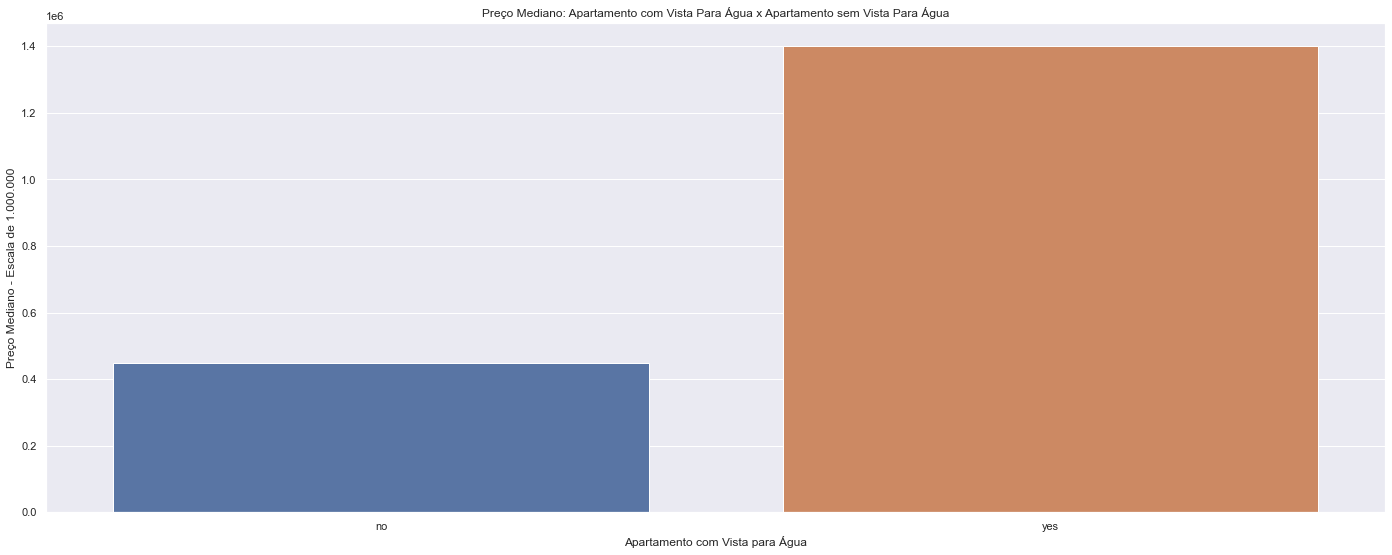

In [22]:
# Agrupamento dos Dados
df_hipotese1 = df3[['price', 'waterfront']].groupby('waterfront').median().reset_index()

# Plotagem dos Gráficos
grafico_hipotese1 = sns.barplot(x='waterfront', y='price', data= df_hipotese1)

# Configuração de Legendas
plt.xlabel('Apartamento com Vista para Água')
plt.ylabel('Preço Mediano - Escala de 1.000.000')
plt.title('Preço Mediano: Apartamento com Vista Para Água x Apartamento sem Vista Para Água')

print(f'Em geral essa afirmação é falsa. A mediana dos preços é de R$ {df3["price"].median()}. Além disso, conseguimos observar que Imóveis com vista para a água possuem um preço mediano de R$ {df_hipotese1.loc[1]["price"]}, logo, concluímos que imóveis com vista para água são, na média, 300% mais caro. Logo, o insight gerado aqui é: Imóveis com vista para a água são uma ótima opção de investimento.') 

##### Afirmação 2: Imóveis com data de construção menor que 1955 são 50% mais baratos, na média, em relação a imóveis com construção maior que 1955.

Em geral essa afirmação é falsa. Em termos de ano de construção, ela possuem a mediana de preço praticamente iguais.
Uma vez que a mediana dos preços é de R$ 450000.0, imóveis com ano de construção menor que 1955 possuem uma mediana de preços de R$452000.0 e imóveis com ano de construção maior que 1955 possuem uma mediana de preços de R$ 450000.0


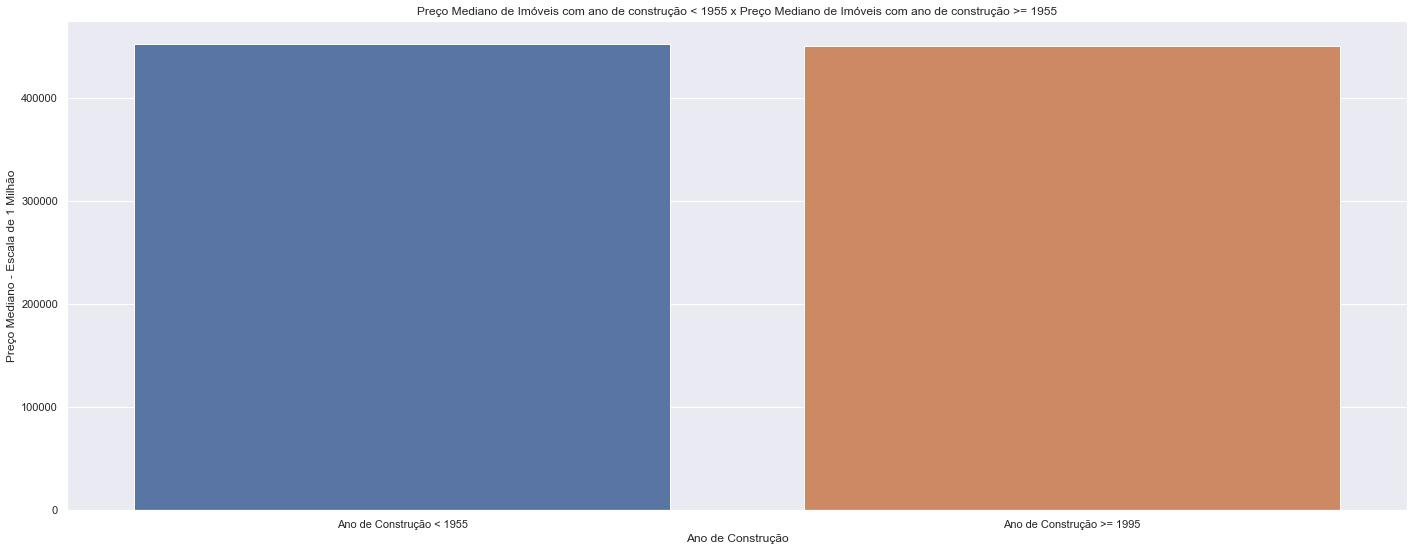

In [23]:
# Agrupamento dos Dados
df_hipotese2 = df3.copy()

# Reajuste dos Dados
df_hipotese2['Year Built'] = df_hipotese2['yr_built'].apply(lambda x: 'Ano de Construção < 1955' if x < 1955 else 'Ano de Construção >= 1995')

# Agrupamento dos Dados
df_hipotese2 = df_hipotese2[['price', 'Year Built']].groupby( 'Year Built').median().reset_index()

# Construção do Gráfico
graphics_hipotese_2 = sns.barplot(data=df_hipotese2, 
                                  x = 'Year Built' , 
                                  y = 'price');

# Rótulos
plt.xlabel('Ano de Construção')
plt.ylabel('Preço Mediano - Escala de 1 Milhão')
plt.title('Preço Mediano de Imóveis com ano de construção < 1955 x Preço Mediano de Imóveis com ano de construção >= 1955')

print(f'Em geral essa afirmação é falsa. Em termos de ano de construção, ela possuem a mediana de preço praticamente iguais.') 
print(f'Uma vez que a mediana dos preços é de R$ {df3["price"].median()}, imóveis com ano de construção menor que 1955 possuem uma mediana de preços de R${df_hipotese2.loc[0]["price"]} e imóveis com ano de construção maior que 1955 possuem uma mediana de preços de R$ {df_hipotese2.loc[1]["price"]}')

##### Afirmação 3: Imóveis com porão são 50% mais caros na média.

Essa afirmação é falsa. Observe que o preço mediano dos imóveis é R$ 450000.0, todavia o preço mediano dos imóveis sem porão é de R$ 411500.0 e o preço mediano  dos imóveis com porão R$ 515000.0. O interessante é que conseguimos extrair um insight relevante: Imóveis com porão é uma boa opção de negócio, uma vez que o seu valor é, na média, R$ 100.000,00 mais caro.


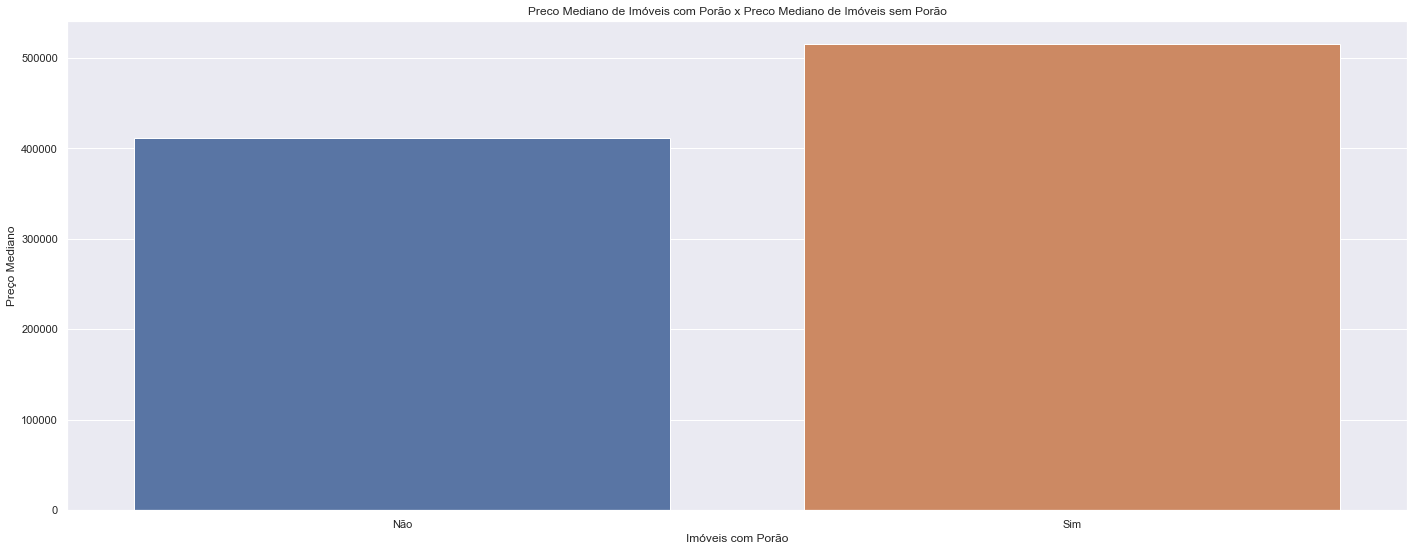

In [24]:
df_hipotese3 = df3.copy()

# Agrupamento
df_hipotese3['basement'] = df3['sqft_basement'].apply(lambda x: 'Sim' if x > 0 else 'Não')

# Obtendo os dados para a construção do gráfico
df_hipotese3 = df_hipotese3[['price', 'basement']].groupby('basement').median().reset_index()

# plotando o gráfico
graphics_hipotese_3 = sns.barplot(x='basement', y='price', data=df_hipotese3)

# Rótulos
plt.xlabel('Imóveis com Porão')
plt.ylabel('Preço Mediano')
plt.title('Preco Mediano de Imóveis com Porão x Preco Mediano de Imóveis sem Porão');

print(f'Essa afirmação é falsa. Observe que o preço mediano dos imóveis é R$ {df3["price"].median()}, todavia o preço mediano dos imóveis sem porão é de R$ {df_hipotese3.iloc[0]["price"]} e o preço mediano  dos imóveis com porão R$ {df_hipotese3.iloc[1]["price"]}. O interessante é que conseguimos extrair um insight relevante: Imóveis com porão é uma boa opção de negócio, uma vez que o seu valor é, na média, R$ 100.000,00 mais caro.')

##### Afirmação 4: Imóveis com mais de 2 pisos são em média, 40 % mais caros.

Essa afirmação é falsa. Observe que o preço mediano dos imóveis é R$ 450000.0, todavia o preço mediano dos imóveis com mais de dois andares é de R$ 527600.0 e o preço mediano  dos imóveis com menos de dois andares R$ 449950.0. O interessante é que conseguimos extrair um insight relevante: Imóveis com mais de dois andares é uma boa opção de negócio, uma vez que o seu valor é, na média, R$ 80.000,00 mais caro.


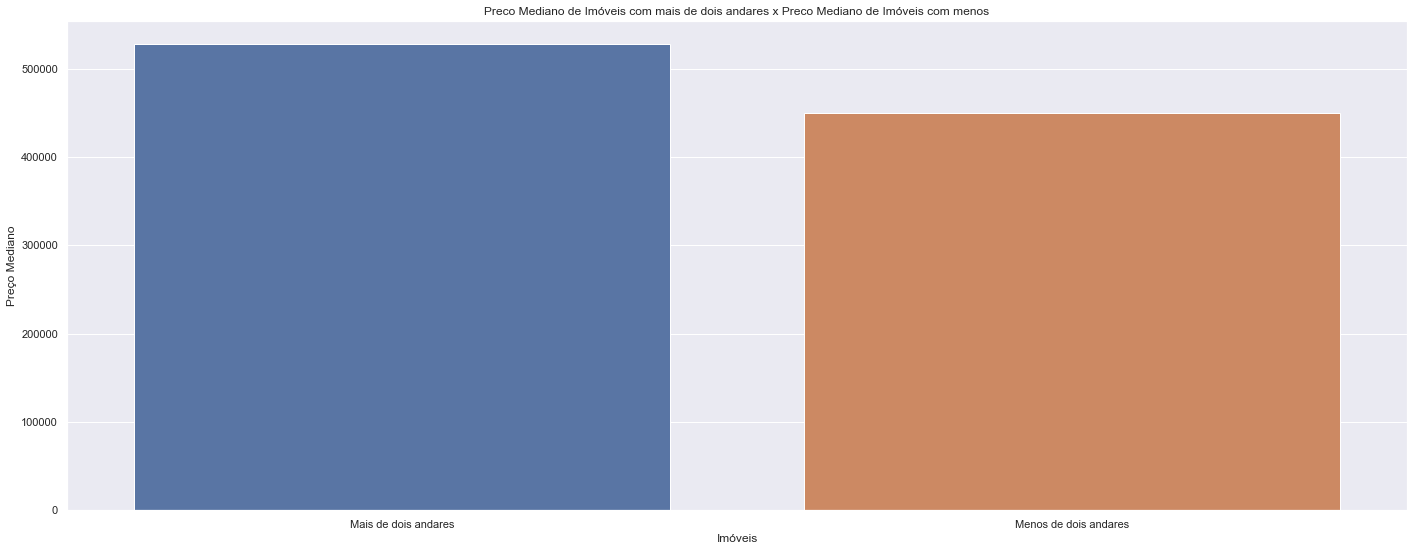

In [25]:
# Carregamento dos Dados
df_hipotese4 = df3.copy()

# Ajuste das Variáves
df_hipotese4['floors']=df_hipotese4['floors'].apply(lambda x: 'Mais de dois andares' if x > 2 else 'Menos de dois andares')

# Agrupamento dos Dados
df_hipotese4 = df_hipotese4[['price', 'floors']].groupby(['floors']).median().reset_index() 

# Construção do Gráfico
graphics_hipotese_4 = sns.barplot(x='floors',
                                  y ='price',
                                  data=df_hipotese4)

# Rótulos
plt.xlabel('Imóveis')
plt.ylabel('Preço Mediano')
plt.title('Preco Mediano de Imóveis com mais de dois andares x Preco Mediano de Imóveis com menos');

print(f'Essa afirmação é falsa. Observe que o preço mediano dos imóveis é R$ {df3["price"].median()}, todavia o preço mediano dos imóveis com mais de dois andares é de R$ {df_hipotese4.iloc[0]["price"]} e o preço mediano  dos imóveis com menos de dois andares R$ {df_hipotese4.iloc[1]["price"]}. O interessante é que conseguimos extrair um insight relevante: Imóveis com mais de dois andares é uma boa opção de negócio, uma vez que o seu valor é, na média, R$ 80.000,00 mais caro.')

##### Afirmação 5:  Imóveis com condições abaixo de 3 são, na média, 35% mais baratos.

Essa afirmação é verdadeira. Observe que o preço mediano dos imóveis é R$ 450000.0, todavia o preço mediano dos imóveis com condição abaixo  de 3 é de R$ 277000.0 e o preço mediano  dos imóveis com menos de dois andares R$ 451000.0. O interessante é que conseguimos extrair um insight relevante: Imóveis com condições abaixo de 3 podem ser um boa opção de negócio, uma vez que o seu valor é, na média, R$ 150.000,00 mais barato que a média do preço geral.


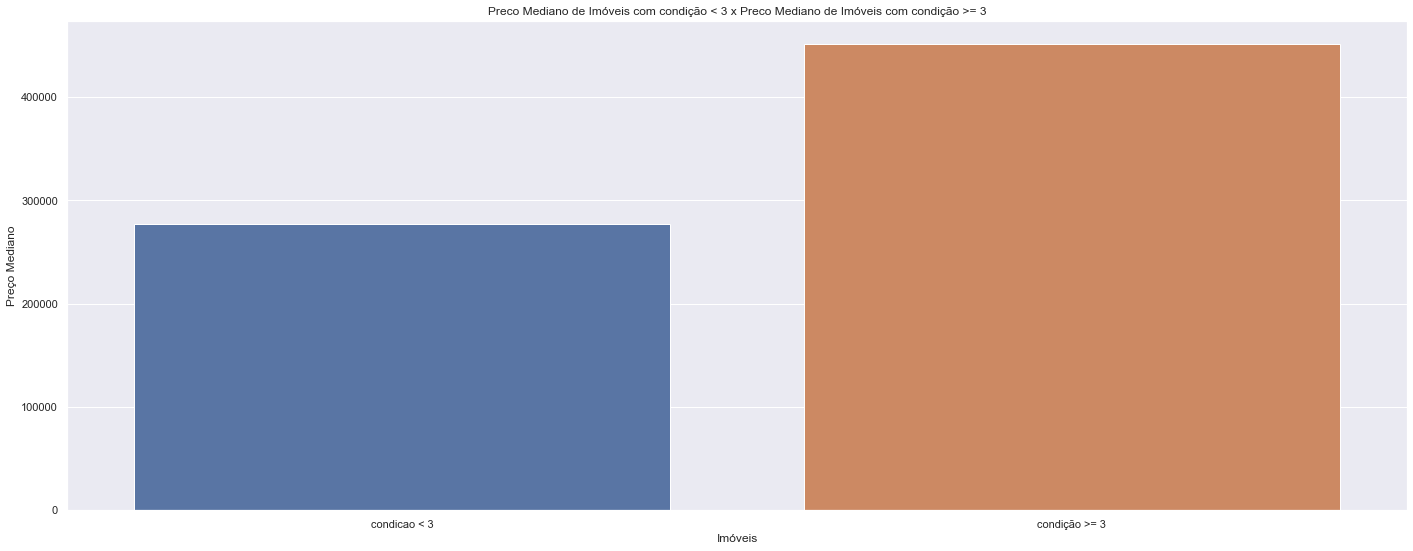

In [26]:
# Carregamento dos Dados
df_hipotese5 = df3.copy()

# Ajuste dos Dados
df_hipotese5['condition'] = df_hipotese5['condition'].apply(lambda x: 'condicao < 3' if x < 3 else 'condição >= 3')

# Agrupamento dos Dados
df_hipotese5 = df_hipotese5[['price', 'condition']].groupby('condition').median().reset_index()

# Construção dos Gráficos
graphics_hipotese_5 = sns.barplot(x='condition', y='price', data=df_hipotese5)

# Rótulos
plt.xlabel('Imóveis')
plt.ylabel('Preço Mediano')
plt.title('Preco Mediano de Imóveis com condição < 3 x Preco Mediano de Imóveis com condição >= 3');

print(f'Essa afirmação é verdadeira. Observe que o preço mediano dos imóveis é R$ {df3["price"].median()}, todavia o preço mediano dos imóveis com condição abaixo  de 3 é de R$ {df_hipotese5.iloc[0]["price"]} e o preço mediano  dos imóveis com condição maior ou igual a 3 é de R$ {df_hipotese5.iloc[1]["price"]}. O interessante é que conseguimos extrair um insight relevante: Imóveis com condições abaixo de 3 podem ser um boa opção de negócio, uma vez que o seu valor é, na média, R$ 150.000,00 mais barato que a média do preço geral.')

## 4.2 - Respondendo as Questões de Negócios

### **1.** Quais são os imóveis que a House Rocket deveria comprar e por qual preço?

Os melhores imóveis para compra estão salvos em um arquivo .csv nomeado recomendacao_compras.csv

#### Relatório com os imóveis com melhor recomendação de compra

In [27]:
# ----------------------- Geração de Relatório com os Melhores Imóveis de Compra ---------------------------------------

# Removendo dados desnecessários
dataset_compra_de_imoveis = dataset_compra_de_imoveis.drop(columns=['seasons', 'median_price_zipcode', 'month'])

# Salvando os dados com as recomendações de compras
dataset_compra_de_imoveis.to_csv('recomendacao_compras.csv', index=False)

### 2. Uma vez a casa comprada, qual o melhor momento para vendê-las e por qual preço?

Determinamos que o melhor momento para se vender a casa seria por sazonalinade, isto é, determinado pelos quatro climas do ano. A determinação do preço ficou da seguinte forma:

- Se o preço de compra do imóvel é menor que o preço mediano geral, considerando a estação do ano, então o preço de venda é o preço de compra + 30%.
- Se o preço de compra do imóvel é maior que o preço mediano geral, considerando a estação do ano, então o preço de venda é o preço de compra + 10%.

Os preços estipulados de acordo com a estação podem ser encontrados nos arquivos  preco_vendas_verao.csv, preco_vendas_inverno.csv, preco_vendas_outono.csv, preco_vendas_primavera.csv.

#### Relatório com os preços de vendas

In [28]:
#----------------------- Geração de Relatório com os Preços de Vendas de Acordo com a Sazonalidade -------------------------

#  VERÃO

# Dropagem da Coluna Desnecessária.
dataset_venda_de_imoveis_summer = dataset_venda_de_imoveis_summer.drop(columns=['median_price_zipcode_summer', 'median_price_zipcode', 'seasons', 'option_buy', 'month'])

# Salvando os preços de Vendas 
dataset_venda_de_imoveis_summer.to_csv('preco_vendas_verao.csv', index=False)

#  INVERNO

# Dropagem da Coluna Desnecessária.
dataset_venda_de_imoveis_winter = dataset_venda_de_imoveis_winter.drop(columns=['median_price_zipcode_winter', 'median_price_zipcode', 'seasons', 'option_buy', 'month'])

# Salvando os preços de Vendas 
dataset_venda_de_imoveis_winter.to_csv('preco_vendas_inverno.csv', index=False)

#  OUTONO

# Dropagem da Coluna Desnecessária.
dataset_venda_de_imoveis_autmumn = dataset_venda_de_imoveis_autmumn.drop(columns=['median_price_zipcode_autmumn', 'median_price_zipcode', 'seasons', 'option_buy', 'month'])

# Salvando os preços de Vendas 
dataset_venda_de_imoveis_autmumn.to_csv('preco_vendas_outono.csv', index=False)

#  PRIMAVERA

# Dropagem da Coluna Desnecessária.
dataset_venda_de_imoveis_spring = dataset_venda_de_imoveis_spring.drop(columns=['median_price_zipcode_spring', 'median_price_zipcode', 'seasons', 'option_buy', 'month'])

# Salvando os preços de Vendas 
dataset_venda_de_imoveis_spring.to_csv('preco_vendas_primavera.csv', index=False)

# 5.0 - Desempenho de Negócio

In [29]:
# -------------------------- CUSTO --------------------------------------

# Custo de Aquisição
custo_aquisicao = dataset_compra_de_imoveis['price'].sum()


#---------------------------- FATURAMENTO -----------------------------------------


# Faturamento Esperado Verão
faturamento_verao = dataset_venda_de_imoveis_summer['sell_price_summer'].sum()

# Faturamento Esperado Inverno
faturamento_inverno = dataset_venda_de_imoveis_winter['sell_price_winter'].sum()

# Faturamento Esperado Primavera
faturamento_primavera = dataset_venda_de_imoveis_spring['sell_price_spring'].sum()

# Faturamento Esperado Outono
faturamento_outono = dataset_venda_de_imoveis_autmumn['sell_price_autmumn'].sum()


# ------------------------ LUCRO ESTIMADO --------------------------------------------


# Lucro Esperado Verão
lucro_verao = faturamento_verao - custo_aquisicao

# lucro esperado inverno
lucro_inverno = faturamento_inverno - custo_aquisicao

# lucro esperado outono
lucro_outono = faturamento_outono - custo_aquisicao

# lucro esperado primavera
lucro_primavera = faturamento_primavera - custo_aquisicao

## Tabela de Desempenho

In [31]:
pd.DataFrame({'Faturamento Esperado': [faturamento_verao, faturamento_primavera, faturamento_outono, faturamento_inverno], 
              'Custo de Aquisição': [custo_aquisicao, custo_aquisicao, custo_aquisicao, custo_aquisicao], 
              'Lucro Esperado':[lucro_verao, lucro_primavera, lucro_outono, lucro_inverno]}, index=['verão', 'primavera', 'outono', 'inverno'])

,Faturamento Esperado,Custo de Aquisição,Lucro Esperado
verão,5275707909.80,4093727008.00,1181980901.80
primavera,5321845110.40,4093727008.00,1228118102.40
outono,5321845110.40,4093727008.00,1228118102.40
inverno,5275318811.00,4093727008.00,1181591803.00
